Data cleanning: remove duplicate images and resize image to 256,256 and RGB mode

In [1]:
from data_preprocessing.data_cleanning import Data_cleanning
data_cleanning = Data_cleanning()
data_cleanning.remove_duplicated_image('ai_generated_images/')
data_cleanning.remove_duplicated_image('human_generated_images/')


checking image number 0 
finished clean all images
checking image number 1 
finished clean all images
checking image number 2 
finished clean all images
checking image number 3 
finished clean all images
checking image number 4 
finished clean all images
checking image number 5 
finished clean all images
checking image number 6 
finished clean all images
checking image number 7 
finished clean all images
checking image number 8 
finished clean all images
checking image number 9 
finished clean all images
checking image number 10 
finished clean all images
checking image number 11 
finished clean all images
checking image number 12 
finished clean all images
checking image number 13 
finished clean all images
checking image number 14 
finished clean all images
checking image number 15 
finished clean all images
checking image number 16 
finished clean all images
checking image number 17 
finished clean all images
checking image number 18 
finished clean all images
checking image number 

Data Redcution: reduce the number of AI-generated images and human-genereated image to a balance state. due to space contrain on github, we gonna reduce the number of image to 50 using random sampling.

In [2]:
from data_preprocessing.data_reduction import Data_reduction
# if output "The number of images is less than the sampling size" that mean the dataset is already being reduced
Data_reduction = Data_reduction(50)
Data_reduction.random_sampling('ai_generated_images/')
Data_reduction.random_sampling('human_generated_images/')

50
The number of images is less than the sampling size
50
The number of images is less than the sampling size


Data labeling: lable the dataset for our supervised model

In [4]:
from data_preprocessing.data_labeling import Data_labeling
ai_data_labeling = Data_labeling()
#label ai-generated images as 0
ai_images, ai_label = ai_data_labeling.labeling('ai_generated_images/', 0)
human_data_labeling = Data_labeling()
#label human-generated images as 1
human_images, human_label = human_data_labeling.labeling('human_generated_images/', 1)
# For testing purpose we not going to save the data, using the exsiting npy file for train the model.
# np.save('ai_images.npy', ai_images)
# np.save('ai_label.npy', ai_label)
# np.save('human_images.npy', human_images)
# np.save('human_label.npy', human_label)
print('ai-generated image array shape: ',ai_images.shape) #(2999, 256, 256, 3)
print('ai-generated label array shape: ',ai_label.shape) #(2999,)
print('human-generated image array shape: ',human_images.shape)#(2999, 256, 256, 3)
print('human-generated label array shape: ',human_label.shape)#(2999,)

ai-generated image array shape:  (50, 256, 256, 3)
ai-generated label array shape:  (50,)
human-generated image array shape:  (50, 256, 256, 3)
human-generated label array shape:  (50,)


In [8]:
# from model_training.convultional_neural_net import CNN
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

#print('This is the ai_image: ', ai_images)
#print('This is the labels: ', ai_label)
#ai_data = np.concatenate(ai_label, ai_images)
#human_data = np.concatenate(human_label, human_images)
ai_images_flat = ai_images.reshape(len(ai_images), -1)
human_images_flat = human_images.reshape(len(human_images), -1)

# Concatenate the data and labels
X = np.concatenate((ai_images_flat, human_images_flat), axis=0)
y = np.concatenate((ai_label, human_label), axis=0)

# Split the dataset into training and testing sets
print('It got here and this is the ai_images: ', ai_images.shape)
print('It got here and this is the x size: ', X.shape)
print('It got here and this is the y size: ', y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# Create and train the SVM model
svm_model = SVC(kernel='linear')  # You can choose other kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

It got here and this is the ai_images:  (50, 256, 256, 3)
It got here and this is the x size:  (100, 196608)
It got here and this is the y size:  (100,)
Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.43      0.44        14
           1       0.53      0.56      0.55        16

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.50      0.50      0.50        30



Original AI images shape: (50, 256, 256, 3)
Original Human images shape: (50, 256, 256, 3)
Resized AI images shape: (50, 28, 28, 3)
Resized Human images shape: (50, 28, 28, 3)
AI images reshaped: (50, 28, 28, 3)
Human images reshaped: (50, 28, 28, 3)
Train images shape: (70, 28, 28, 3)
Test images shape: (30, 28, 28, 3)
Epoch 1/5


/Users/zhixiangyan/Desktop/school/summer 2024/ml4641/project/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.4545 - loss: 0.6931 - val_accuracy: 0.3667 - val_loss: 0.6951
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5481 - loss: 0.6924 - val_accuracy: 0.3667 - val_loss: 0.6962
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5989 - loss: 0.6911 - val_accuracy: 0.3667 - val_loss: 0.6966
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5520 - loss: 0.6920 - val_accuracy: 0.3667 - val_loss: 0.6959
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5598 - loss: 0.6920 - val_accuracy: 0.3667 - val_loss: 0.6961
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3667 - loss: 0.6961
Test accuracy: 0.36666667461395264


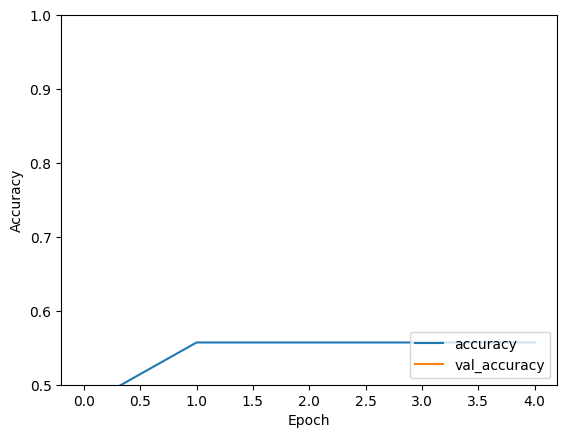

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from skimage.transform import resize

# Assuming ai_images and human_images are numpy arrays with shape (num_samples, 256, 256, 3)
print(f"Original AI images shape: {ai_images.shape}")
print(f"Original Human images shape: {human_images.shape}")

# Resize images to 28x28
ai_images_resized = np.array([resize(image, (28, 28, 3)) for image in ai_images])
human_images_resized = np.array([resize(image, (28, 28, 3)) for image in human_images])

print(f"Resized AI images shape: {ai_images_resized.shape}")
print(f"Resized Human images shape: {human_images_resized.shape}")

# Reshape images to add channel dimension
ai_images_flat = ai_images_resized.reshape(len(ai_images_resized), 28, 28, 3)
human_images_flat = human_images_resized.reshape(len(human_images_resized), 28, 28, 3)

print(f"AI images reshaped: {ai_images_flat.shape}")
print(f"Human images reshaped: {human_images_flat.shape}")

# Combine the data and labels
X = np.concatenate((ai_images_flat, human_images_flat), axis=0)
y = np.concatenate((ai_label, human_label), axis=0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Normalize the images
train_images, test_images = X_train / 255.0, X_test / 255.0

# Ensure the data is reshaped correctly
print('Train images shape:', train_images.shape)
print('Test images shape:', test_images.shape)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, y_train, epochs=5, 
                    validation_data=(test_images, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, y_test)
print(f"Test accuracy: {test_acc}")

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
ai_images = np.load('ai_images.npy')
human_images = np.load('human_images.npy')
ai_labels = np.load('ai_label.npy')
human_labels = np.load('human_label.npy')

# Print data shapes
print(f"AI images shape: {ai_images.shape}")
print(f"Human images shape: {human_images.shape}")
print(f"AI labels shape: {ai_labels.shape}")
print(f"Human labels shape: {human_labels.shape}")

# Combine the data
X = np.concatenate((ai_images, human_images), axis=0)
y = np.concatenate((ai_labels, human_labels), axis=0)

# Print combined data shapes
print(f"Combined images shape: {X.shape}")
print(f"Combined labels shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print train/test data shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Flatten the images for the SVM
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Print flattened data shapes
print(f"X_train_flat shape: {X_train_flat.shape}")
print(f"X_test_flat shape: {X_test_flat.shape}")

# Train the SVM model
print("Training SVM model...")
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_flat, y_train)
print("SVM model training completed.")

# Predict and evaluate the SVM model
print("Predicting with SVM model...")
y_pred_svm = svm_model.predict(X_test_flat)
print("Prediction completed.")

# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)
svm_cm = confusion_matrix(y_test, y_pred_svm)

print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM Classification Report:\n{svm_report}")

# Visualize the confusion matrix for SVM
plt.figure(figsize=(10, 7))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


AI images shape: (2999, 256, 256, 3)
Human images shape: (2999, 256, 256, 3)
AI labels shape: (2999,)
Human labels shape: (2999,)
Combined images shape: (5998, 256, 256, 3)
Combined labels shape: (5998,)
X_train shape: (4198, 256, 256, 3)
X_test shape: (1800, 256, 256, 3)
y_train shape: (4198,)
y_test shape: (1800,)
X_train_flat shape: (4198, 196608)
X_test_flat shape: (1800, 196608)
Training SVM model...
